In [1]:
from traffic.core import Traffic

In [2]:
import matplotlib.pyplot as plt
from cartes.crs import Lambert93, PlateCarree

In [3]:
t = Traffic.from_file(f'/home/arnault/Traffic/traffic/results/combined_traff/TO_LFPO_filtered_all_runways_1_07_cutted_d2_stall_t_del.pkl')

In [4]:
def plot_traffic(
    traffic: Traffic,
) -> None:
    """Plots the traffic in entry"""
    with plt.style.context("traffic"):
        fig, ax = plt.subplots(subplot_kw=dict(projection=Lambert93()))
        traffic.plot(ax, alpha=0.2, color="blue")
        plt.show()


In [5]:
t = t.aircraft_data()

In [ ]:
from collections import Counter
from traffic.core import tqdm


def display_traffic_per_typecode(
    traff:Traffic
) -> None:
    all_traffic = []
    labels = Counter(list(traff.data[traff.data["typecode"].notnull()]["typecode"].iloc[0::200])).most_common(10)
    print(labels)
    for typecode,num_f in labels:
        n_t =traff.query(f"typecode == '{typecode}'") 
        all_traffic.append((n_t,num_f))
    
    all_traffic.sort(key=lambda x:x[1],reverse=True)
    print([l for _,l in all_traffic])
        
    
    with plt.style.context("traffic"):
        fig, axes = plt.subplots(
            2,
            5,
            subplot_kw=dict(projection=Lambert93()),
            figsize=(15, 8),
            sharex=True,
            sharey=True,
        )
        axes = axes.flatten()

        for ax, (traff,t_len) in tqdm(
            zip(axes, all_traffic), desc="Plotting"
        ):
            traff.sample(500).plot(ax, alpha=0.3, color="orange")
            ax.set_title(f"Typecode: {traff[0].typecode},\n N = {t_len}")

        plt.tight_layout()
        plt.show()

In [25]:
display_traffic_per_typecode(t)

[('B738', 39133), ('A320', 27301), ('A321', 11955), ('A319', 6897), ('A20N', 4630), ('A318', 3870), ('A21N', 2710), ('A359', 1901), ('E145', 1863), ('A333', 1458), ('A332', 1362)]
[39133, 27301, 11955, 6897, 4630, 3870, 2710, 1901, 1863, 1458, 1362]


Plotting: 0it [00:00, ?it/s]

KeyboardInterrupt: 

In [ ]:
def display_traffic_per_typecode(
    data_clean: Data_cleaner, plt_path: str, background: bool = False
) -> None:
    all_traffic = data_clean.traffic_per_label()
    labels = data_clean.get_typecodes_labels()
    with plt.style.context("traffic"):
        fig, axes = plt.subplots(
            2,
            5,
            subplot_kw=dict(projection=Lambert93()),
            figsize=(15, 8),
            sharex=True,
            sharey=True,
        )
        axes = axes.flatten()

        for ax, traff, label in tqdm(
            zip(axes, all_traffic, labels), desc="Plotting"
        ):
            traff.plot(ax, alpha=0.5, color="orange")
            ax.set_title(f"Typecode: {label},\n N = {len(traff)}")

        plt.tight_layout()
        plt.savefig(plt_path)
        plt.show()

In [4]:
len(t)

113904

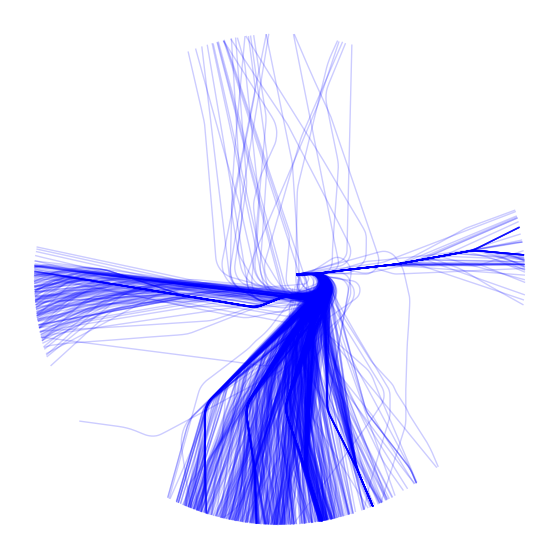

In [8]:
plot_traffic(t.sample(1000))

In [9]:
t.start_time,t.end_time

(Timestamp('2021-02-01 09:12:03+0000', tz='UTC'),
 Timestamp('2024-12-27 21:55:34+0000', tz='UTC'))

In [12]:
from collections import Counter
t= t.aircraft_data()
print("aircraft data optained")
num_typecodes = Counter(list(t.data["typecode"].iloc[0::200]))

aircraft data optained


In [15]:
num_typecodes.most_common(11)

[('B738', 39133),
 ('A320', 27301),
 ('A321', 11955),
 ('A319', 6897),
 (nan, 4994),
 ('A20N', 4630),
 ('A318', 3870),
 ('A21N', 2710),
 ('A359', 1901),
 ('E145', 1863),
 ('A333', 1458)]

In [22]:
traff_train = Traffic.from_file(f'/home/arnault/Traffic/traffic/results/combined_traff/TO_LFPO_filtered_all_runways_1_07_cutted_train_d2_stall_t_del.pkl')

In [24]:
# traff_train = traff_train.aircraft_data()
Counter(list(traff_train.data[traff_train.data["typecode"].notnull()]["typecode"].iloc[0::200]))

Counter({'B738': 31358,
         'A320': 21732,
         'A321': 9573,
         'A319': 5538,
         'A20N': 3690,
         'A318': 3100,
         'A21N': 2181,
         'A359': 1523,
         'E145': 1467,
         'A333': 1186,
         'A332': 1113,
         'B77W': 649,
         'A339': 493,
         'A35K': 484,
         'B737': 454,
         'B772': 419,
         'AT45': 324,
         'B788': 266,
         'E195': 261,
         'AT76': 253,
         'E190': 222,
         'CRJ9': 219,
         'B789': 136,
         'B736': 118,
         'B38M': 86,
         'E75S': 60,
         'CRJX': 56,
         'E135': 36,
         'B190': 30,
         'A343': 11,
         'FA7X': 10,
         'GLEX': 7,
         'B733': 5,
         'B763': 4,
         'F2TH': 4,
         'E35L': 3,
         'B764': 3,
         'GLF6': 3,
         'BE20': 3,
         'BCS3': 2,
         'E50P': 2,
         'B748': 2,
         'SB91': 2,
         'PA34': 2,
         'C510': 2,
         'C56X': 2,
         'F9